# Rotation exploration

This notebook explores the effect of band ratios when power spectrum are rotated around a given frequency.

In [1]:
%matplotlib inline
import sys
sys.path.append('../bratios')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from fooof.sim import *
from fooof import FOOOF, FOOOFGroup
from fooof.plts import plot_spectra

from ratios import *

Consider a power spectrum. Here we will explore the affects that rotating the power spectrum around a given frequency has on resulting band ratio values. We have two free parameters to set: the frequency where we rotate, and the amount of rotation.

In [7]:
# Calculate power spectra which varying rotational frequency and rotation amount
fs, ps = gen_power_spectrum(FREQ_RANGE, AP_DEF, ROT_OSC)
output = np.zeros(shape=(len(ROTS), len(DELS), len(fs)))

rot_freq_step = Stepper(ROT_FREQS[0], ROT_FREQS[1], ROT_INC)

for rot_ind, rot_val in enumerate(rot_freq_step):
    delta_step = Stepper(DEL_RANGE[0], DEL_RANGE[1], DEL_INC)
    for del_ind, del_val, in enumerate(delta_step):
        output[rot_ind, del_ind, :] = rotate_spectrum(fs, ps, del_val, rot_val)

np.save(ROT_DEL_PATH, output)

In [4]:
impt = np.load(ROT_DEL_PATH+".npy")
# [rotations, deltas, freqs]

In [5]:
# Calculate Theta/Beta ratio for ratational power spectra.
ratios = np.zeros(shape =(len(impt), len(impt[0])) )
for rot_ind, rot_val in enumerate(impt):
    
    for del_ind, del_val in enumerate(impt[0]):
        psd = impt[rot_ind, del_ind,:]
        ratios[rot_ind, del_ind] = calc_band_ratio(fs, psd, THETA_BAND, BETA_BAND)

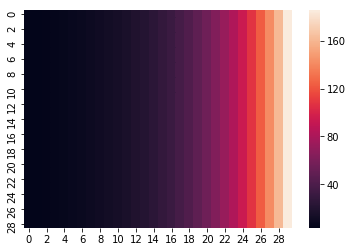

In [6]:
sns.heatmap(ratios)

Notice that ratio measures are completely not affected rotational amount

In the next notebook we will bring in a human EEG dataset from the ChildMind Institute and analye their ratios by parameterizing their power spectra.